In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/train.csv')

In [4]:
mergedData = dataset.drop(['Unnamed: 0'],axis=1)
mergedData

,Date,AdjClose,Comp,Pos,Neg,Neu,TextBlobPolarity
0,2020-01-02,298.829956,0.9992,0.145,0.063,0.791,0.107992
1,2020-01-03,295.924713,0.9987,0.107,0.061,0.832,0.121075
2,2020-01-06,298.282715,0.9964,0.086,0.049,0.865,0.119084
3,2020-01-07,296.879883,0.9311,0.073,0.060,0.867,0.128024
4,2020-01-08,301.655548,0.9945,0.092,0.061,0.847,0.077918
...,...,...,...,...,...,...,...
116,2020-06-19,349.720001,0.9996,0.113,0.037,0.849,0.163768
117,2020-06-22,358.869995,0.9997,0.118,0.036,0.846,0.224847
118,2020-06-23,366.529999,0.9990,0.087,0.042,0.870,0.129869
119,2020-06-24,360.059998,0.9996,0.112,0.042,0.846,0.152855


In [5]:
mergedData['Target'] = ''
for i in range(120):
  mergedData.at[i,'Target'] = mergedData.at[i+1,'AdjClose']

mergedData

,Date,AdjClose,Comp,Pos,Neg,Neu,TextBlobPolarity,Target
0,2020-01-02,298.829956,0.9992,0.145,0.063,0.791,0.107992,295.925
1,2020-01-03,295.924713,0.9987,0.107,0.061,0.832,0.121075,298.283
2,2020-01-06,298.282715,0.9964,0.086,0.049,0.865,0.119084,296.88
3,2020-01-07,296.879883,0.9311,0.073,0.060,0.867,0.128024,301.656
4,2020-01-08,301.655548,0.9945,0.092,0.061,0.847,0.077918,308.063
...,...,...,...,...,...,...,...,...
116,2020-06-19,349.720001,0.9996,0.113,0.037,0.849,0.163768,358.87
117,2020-06-22,358.869995,0.9997,0.118,0.036,0.846,0.224847,366.53
118,2020-06-23,366.529999,0.9990,0.087,0.042,0.870,0.129869,360.06
119,2020-06-24,360.059998,0.9996,0.112,0.042,0.846,0.152855,364.84


In [6]:
mergedData.drop(index=120,axis=0,inplace=True)

In [ ]:
mergedData

,Date,AdjClose,Comp,Pos,Neg,Neu,TextBlobPolarity,Target
0,2020-01-02,298.829956,0.9992,0.145,0.063,0.791,0.107992,295.925
1,2020-01-03,295.924713,0.9987,0.107,0.061,0.832,0.121075,298.283
2,2020-01-06,298.282715,0.9964,0.086,0.049,0.865,0.119084,296.88
3,2020-01-07,296.879883,0.9311,0.073,0.060,0.867,0.128024,301.656
4,2020-01-08,301.655548,0.9945,0.092,0.061,0.847,0.077918,308.063
...,...,...,...,...,...,...,...,...
115,2020-06-18,351.730011,0.9995,0.109,0.039,0.852,0.144811,349.72
116,2020-06-19,349.720001,0.9996,0.113,0.037,0.849,0.163768,358.87
117,2020-06-22,358.869995,0.9997,0.118,0.036,0.846,0.224847,366.53
118,2020-06-23,366.529999,0.9990,0.087,0.042,0.870,0.129869,360.06


In [7]:
mergedData.corr()

,AdjClose,Comp,Pos,Neg,Neu,TextBlobPolarity
AdjClose,1.000000,0.011569,0.113672,-0.201529,0.044708,0.275781
Comp,0.011569,1.000000,0.315939,-0.319016,-0.033324,0.187130
Pos,0.113672,0.315939,1.000000,-0.110895,-0.731434,0.417079
Neg,-0.201529,-0.319016,-0.110895,1.000000,-0.596246,-0.307265
Neu,0.044708,-0.033324,-0.731434,-0.596246,1.000000,-0.125196
TextBlobPolarity,0.275781,0.187130,0.417079,-0.307265,-0.125196,1.000000


In [8]:
Y = np.array(mergedData.Target)
Y = Y.reshape(120,1)

X = pd.DataFrame(mergedData,columns=['AdjClose','Pos','Neg','Neu'])
X = X.to_numpy()

print(X.shape,Y.shape)

(120, 4) (120, 1)


In [9]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.2)

In [ ]:
priceData = xtrain[:,0].reshape(-1,1)
scaler = StandardScaler().fit(priceData)
xtrain[:,0] = scaler.transform(priceData).reshape(-1)

In [ ]:
ytrain = scaler.transform(ytrain)

In [ ]:
priceData = xtest[:,0].reshape(-1,1)
xtest[:,0] = scaler.transform(priceData).reshape(-1)
ytest = scaler.transform(ytest)

## **XGBoost Regressor**

In [10]:
xgbr = xgb.XGBRegressor(verbosity=0,)
xgbr.fit(xtrain, ytrain)
score = xgbr.score(xtrain, ytrain) 
print("Training score: ", score)
score = xgbr.score(xtest, ytest)  
print("Test score: ", score)

Training score:  0.9884445280176551
Test score:  0.845274541262885


In [11]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print('ON TRAIN')
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ON TRAIN
Mean cross-validation score: 0.83
K-fold CV average score: 0.84


In [12]:
ypredtrain = xgbr.predict(xtrain)
mse = mean_squared_error(ytrain, ypredtrain)
print('ON TRAIN')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

ON TRAIN
MSE: 11.65
RMSE: 5.82


In [13]:
ypredtest = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypredtest)
print('ON TEST')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

ON TEST
MSE: 141.18
RMSE: 70.59


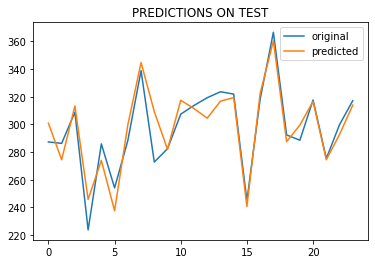

In [14]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypredtest, label="predicted")
plt.title("PREDICTIONS ON TEST")
plt.legend()
plt.show()

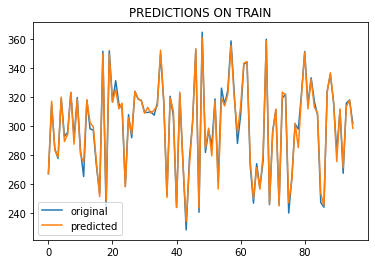

In [15]:
x_ax = range(len(ytrain))
plt.plot(x_ax, ytrain, label="original")
plt.plot(x_ax, ypredtrain, label="predicted")
plt.title("PREDICTIONS ON TRAIN")
plt.legend()
plt.show()

## **Ridge Regression**

In [16]:
clf = RidgeCV(alphas=[15]).fit(xtrain, ytrain)
print(f'Train:{clf.score(xtrain, ytrain)}')
print(f'Test:{clf.score(xtest, ytest)}')

Train:0.9073120020143765
Test:0.9448867040075601


In [17]:
ypredtest = clf.predict(xtest)

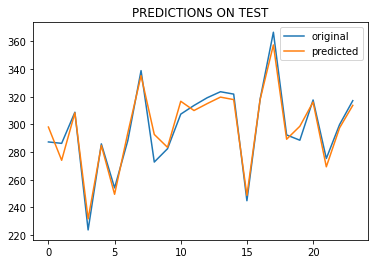

In [18]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypredtest, label="predicted")
plt.title("PREDICTIONS ON TEST")
plt.legend()
plt.show()

# **Random Forest Regressor**

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(xtrain,ytrain)
print(f'Train:{rfr.score(xtrain, ytrain)}')
print(f'Test:{rfr.score(xtest, ytest)}')

Train:0.9847001487189525
Test:0.8839225005579814


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Score:0.8839225005579814


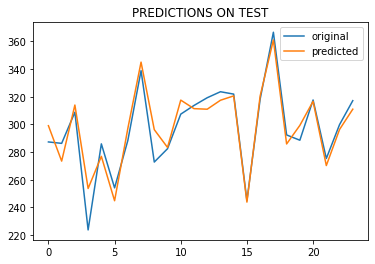

In [20]:
print(f'Score:{rfr.score(xtest,ytest)}')
ypredtest = rfr.predict(xtest)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypredtest, label="predicted")
plt.title("PREDICTIONS ON TEST")
plt.legend()
plt.show()

# **Support Vector Machines**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ON TRAIN
SVR_LIN: 0.8647519414799743
SVR_POLY: 0.9093369091671047
SVR_RBF: 0.9436134360322921

ON TEST
SVR_LIN: 0.9135445554431292
SVR_POLY: 0.9468257270800232
SVR_RBF: 0.669593534070004


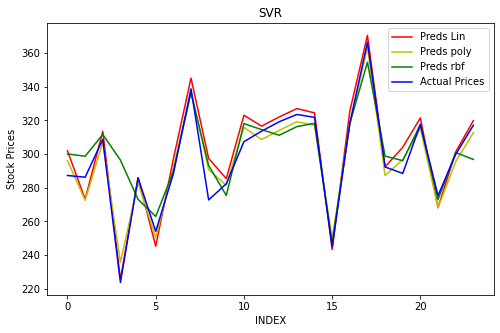

In [21]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear',C=1e3)
svr_poly = SVR(kernel='poly',C=1e3 ,degree = 2)
svr_rbf = SVR(kernel='rbf' , C=1e3 ,gamma = 0.1)
    
svr_lin.fit(xtrain,ytrain)
svr_poly.fit(xtrain,ytrain)
svr_rbf.fit(xtrain,ytrain)

print('ON TRAIN')
print('SVR_LIN:',svr_lin.score(xtrain,ytrain))
print('SVR_POLY:',svr_poly.score(xtrain,ytrain))
print('SVR_RBF:',svr_rbf.score(xtrain,ytrain))

print('\nON TEST')
print('SVR_LIN:',svr_lin.score(xtest,ytest))
print('SVR_POLY:',svr_poly.score(xtest,ytest))
print('SVR_RBF:',svr_rbf.score(xtest,ytest))

preds_lin = svr_lin.predict(xtest)
preds_poly = svr_poly.predict(xtest)
preds_rbf = svr_rbf.predict(xtest)

fig,ax = plt.subplots()
fig.set_size_inches(8, 5)
ax.plot(preds_lin,color='r',label='Preds Lin')
ax.plot(preds_poly,color='y',label='Preds poly')
ax.plot(preds_rbf,color='g',label='Preds rbf')
ax.plot(ytest,color='b',label='Actual Prices')
ax.set_xlabel('INDEX')
ax.set_ylabel('Stock Prices')
ax.set_title('SVR')
leg = ax.legend();

# **Saving Models...**

In [ ]:
'''
import pickle

file = open('/content/drive/My Drive/Project/RandomForest-1jul.pkl','wb')
pickle.dump(rfr,file)

file = open('/content/drive/My Drive/Project/xgb-1jul.pkl','wb')
pickle.dump(xgbr,file)

file = open('/content/drive/My Drive/Project/ridge-1jul.pkl','wb')
pickle.dump(clf,file)

file = open('/content/drive/My Drive/Project/svm-1jul.pkl','wb')
pickle.dump(clf,file)
'''

In [23]:
test = pd.read_csv('/content/testMerged.csv',usecols=['AdjClose','Target','Comp','Pos','Neg','Neu'])
test

,AdjClose,Target,Comp,Pos,Neg,Neu
0,361.779999,364.799988,0.9999,0.116,0.032,0.852
1,364.799988,364.109985,0.9999,0.110,0.027,0.864
2,364.109985,366.519989,0.9999,0.110,0.026,0.864


In [24]:
testY = np.array(test.Target).reshape(3,1)
testX = pd.DataFrame(test,columns=['AdjClose','Pos','Neg','Neu'])
testX = testX.to_numpy()

In [ ]:
priceData = testX[:,0].reshape(-1,1)
testX[:,0] = scaler.transform(priceData).reshape(-1)
testY = scaler.transform(testY)

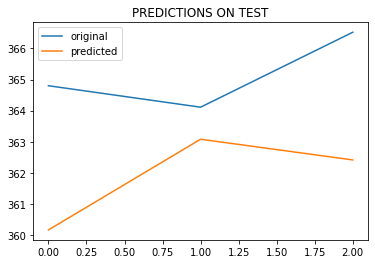

In [26]:
pred = clf.predict(testX)

x_ax = range(len(testY))
plt.plot(x_ax, testY, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("PREDICTIONS ON TEST")
plt.legend()
plt.show()